# Creating Database
<br>

<br>
<br>

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df_air = pd.read_csv('air_polution.csv')
df_air.head()

,Country Name,Country Code,1990,1995,2000,2005,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,AFG,65.486792,65.179513,64.922462,64.522683,65.245592,66.835727,66.023174,61.366745,59.010330,61.252656,56.287047,56.910808
1,Angola,AGO,36.448116,35.602908,36.182968,34.962912,33.787247,33.104195,33.415495,34.663923,32.974025,32.729873,31.785389,32.388505
2,Albania,ALB,22.718663,22.029218,21.998248,21.575258,21.277828,22.772537,20.578259,19.938517,18.883955,19.512540,18.189934,18.200603
3,Andorra,AND,14.118742,13.936867,12.594015,12.961378,12.807198,13.273506,12.407053,11.813673,10.830418,11.462178,10.255834,10.307621
4,Arab World,ARB,53.300266,52.543409,53.063076,52.395251,53.787001,52.652279,53.297270,54.053822,52.583603,60.406813,58.764905,58.689259


In [3]:
cols = ['Country Code']
for i in range(1985, 2015):
    cols.append(str(i))

In [4]:
df_co2 = pd.read_csv('CO2_emission.csv')
df_co2 = df_co2[cols]
df_co2 = df_co2.dropna()
df_co2.head()

,Country Code,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
1,AFG,0.293957,0.267772,0.269230,0.246823,0.233882,0.210643,0.183364,0.096197,0.085087,...,0.051744,0.062428,0.083893,0.151721,0.238399,0.289988,0.406424,0.345149,0.310341,0.293946
2,AGO,0.471903,0.451619,0.544085,0.463508,0.437295,0.431744,0.415531,0.410523,0.441721,...,0.985736,1.105019,1.203134,1.185000,1.234425,1.244092,1.252681,1.330219,1.253776,1.290307
3,ALB,2.658015,2.665356,2.414061,2.331599,2.783243,1.678107,1.312213,0.774725,0.723790,...,1.412498,1.302576,1.322335,1.484311,1.495600,1.578574,1.803715,1.692908,1.749211,1.978763
5,ARB,3.061850,3.284500,3.197806,3.295043,3.256674,3.016959,3.236645,3.415485,3.669446,...,4.185677,4.285719,4.117148,4.408948,4.562015,4.636813,4.559462,4.837780,4.674925,4.886988
6,ARE,36.544811,32.657135,31.100021,29.726963,31.574754,28.444624,29.430225,28.319389,30.361763,...,25.314486,23.371860,21.985933,22.195490,21.214060,18.808520,18.491617,19.294920,18.559236,22.939606


In [5]:
df_pop = pd.read_csv("population.csv")
df_pop = df_pop[cols]
df_pop = df_pop.dropna()
df_pop.head()

,Country Code,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,ABW,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,...,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0
1,AFG,11938208.0,11736179.0,11604534.0,11618005.0,11868877.0,12412308.0,13299017.0,14485546.0,15816603.0,...,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0
2,AGO,9961997.0,10320111.0,10689250.0,11068050.0,11454777.0,11848386.0,12248901.0,12657366.0,13075049.0,...,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0
3,ALB,2964762.0,3022635.0,3083605.0,3142336.0,3227943.0,3286542.0,3266790.0,3247039.0,3227287.0,...,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0
4,AND,44600.0,46517.0,48455.0,50434.0,52448.0,54509.0,56671.0,58888.0,60971.0,...,78867.0,80993.0,82684.0,83862.0,84463.0,84449.0,83747.0,82427.0,80774.0,79213.0


In [6]:
country_codes = list(
    set(df_pop['Country Code']) & set(df_co2['Country Code'])
    & set(df_air['Country Code']))
country_codes.pop(152)
country_codes.sort()

In [7]:
years = df_air.columns[2:]

In [8]:
years

Index(['1990', '1995', '2000', '2005', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017'],
      dtype='object')

In [9]:
gradient = {}
for abc in country_codes:
    gradient[abc] = 0

In [10]:
slope = [0, 0]

In [11]:
for abc in country_codes:
    x = float(df_air[df_air['Country Code'] == abc][years[1]] -
              df_air[df_air['Country Code'] == abc][years[0]])
    y = int(years[1]) - int(years[0])
    slope[0] = x / y
    for i in range(1, len(years) - 1):
        x = float(df_air[df_air['Country Code'] == abc][years[i + 1]] -
                  df_air[df_air['Country Code'] == abc][years[i]])
        y = int(years[i + 1]) - int(years[i])
        slope[1] = x / y
        gradient[abc] += abs((slope[1] - slope[0]) / y)
        slope[0] = slope[1]

In [12]:
gradient_array = np.round([v for k,v in gradient.items()],3)

In [13]:
km = KMeans(n_clusters = 3)
km.fit(np.asarray(gradient_array).reshape(-1,1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

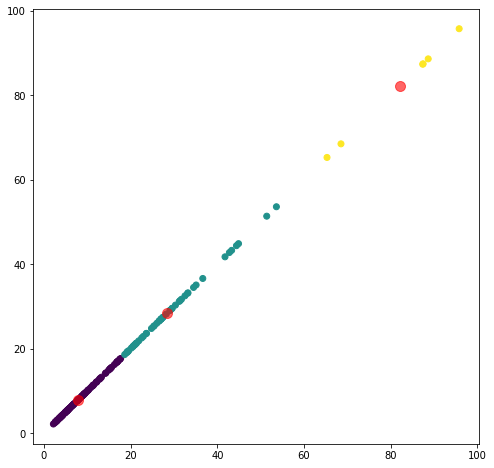

In [14]:
plt.figure(figsize=(8,8))
plt.scatter(gradient_array,gradient_array,c=km.labels_)
plt.scatter(km.cluster_centers_,km.cluster_centers_,100,color='red',alpha=0.6)
plt.show()

In [15]:
km.labels_

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 2, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [16]:
df_co2.index = np.arange(0, len(df_co2), 1)
df_pop.index = np.arange(0, len(df_pop), 1)

In [17]:
drop_array = []
for i in range(0, len(df_co2['Country Code'])):
    if df_co2['Country Code'].tolist()[i] not in country_codes:
        drop_array.append(i)
df_co2 = df_co2.drop(drop_array)
df_co2.index = np.arange(0, len(df_co2), 1)

In [18]:
drop_array = []
for i in range(0, len(df_pop['Country Code'])):
    if df_pop['Country Code'][i] not in country_codes:
        drop_array.append(i)
df_pop = df_pop.drop(drop_array)
df_pop.index = np.arange(0, len(df_pop), 1)

In [19]:
df_pop.insert(0,'Gradient',km.labels_,True)
df_co2.insert(0,'Gradient',km.labels_,True)

In [20]:
df_pop = df_pop.sort_values(by=['Gradient','Country Code'],ascending=True)
df_co2 = df_co2.sort_values(by=['Gradient','Country Code'],ascending=True)
df_co2.index = np.arange(0, len(df_co2), 1)
df_pop.index = np.arange(0, len(df_pop), 1)

In [21]:
def co2_emm(u, v):
    def co2_emm_helper(u, v):
        total_pop = 0
        total_co2 = 0
        total_pop1 = 0
        for i in range(0, v - u):
            total_co2 += pop[i] * co2[i]
            total_pop += int(pop[i])
        return total_co2 / total_pop

    yo = 0.0
    co2 = []
    pop = []
    for i in range(1985, 2015):
        co2 = df_co2[str(i)][u:v].tolist()
        pop = df_pop[str(i)][u:v].tolist()
        yo += co2_emm_helper(u, v)
    return (yo * 0.00963)

In [22]:
len_LT = len(df_pop[df_pop['Gradient']==0])
len_MT = len(df_pop[df_pop['Gradient']==1])
len_ST = len(df_pop[df_pop['Gradient']==2])

In [23]:
co2_emm(0,195)

0.9607159178813849

In [24]:
yo_LT = co2_emm(0, len_LT)
yo_MT = co2_emm(len_LT, len_LT+len_MT)
yo_ST = co2_emm(len_LT+len_MT, len_LT+len_MT+len_ST)
print('LT: ', yo_LT, '\nMT: ', yo_MT, '\nST: ', yo_ST)

LT:  1.5215633172859166 
MT:  0.8029825138288714 
ST:  0.6971150904142657


In [25]:
LT_values = df_co2.values[0:len_LT, 2:]
MT_values = df_co2.values[len_LT:len_LT+len_MT, 2:]
ST_values = df_co2.values[len_LT+len_MT:len_LT+len_MT+len_ST, 2:]

In [26]:
for i in range(0, len_LT):
    LT_values[i] = LT_values[i] * (yo_LT / sum(LT_values[i]))

for i in range(0, len_MT):
    MT_values[i] = MT_values[i] * (yo_MT / sum(MT_values[i]))

for i in range(0, len_ST):
    ST_values[i] = ST_values[i] * (yo_ST / sum(ST_values[i]))

In [27]:
sum(ST_values[1]) + sum(MT_values[1]) + sum(LT_values[1])

3.0216609215290546

In [28]:
sum(ST_values[5]) + sum(MT_values[5]) + sum(LT_values[5])

3.0216609215290537

In [29]:
def pop_manager(u, v):
    yo = []
    pop = []
    for i in range(1985, 2015):
        pop = df_pop[str(i)][u:v].tolist()
        yo.append(int(sum(pop)))
    return yo

In [30]:
LT_values = LT_values.tolist()
LT_values.append(pop_manager(0, len_LT))

MT_values = MT_values.tolist()
MT_values.append(pop_manager(len_LT, len_LT+len_MT))

ST_values = ST_values.tolist()
ST_values.append(pop_manager(len_LT+len_MT, len_LT+len_MT+len_ST))
print('LT: ', LT_values[-1][-1], '\nMT: ', MT_values[-1][-1], '\nST: ',
      ST_values[-1][-1])

LT:  16359651010 
MT:  57434513485 
ST:  265366668


In [31]:
df_LT = pd.DataFrame(LT_values, columns=df_co2.columns[2:])
df_MT = pd.DataFrame(MT_values, columns=df_co2.columns[2:])
df_ST = pd.DataFrame(ST_values, columns=df_co2.columns[2:])

In [32]:
df_LT.to_csv('LT_db.csv')
df_MT.to_csv('MT_db.csv')
df_ST.to_csv('ST_db.csv')